In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('stats_maxspheres0.csv', delimiter=';')
print(df.columns.tolist())

['Uses Octree', 'Spheres', 'Max Octree Depth', 'Min Spheres Per Node', 'Num Samples', 'Max Rays Depth', 'Screen Width', 'Screen Height', 'Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS', 'Octree Build Time']


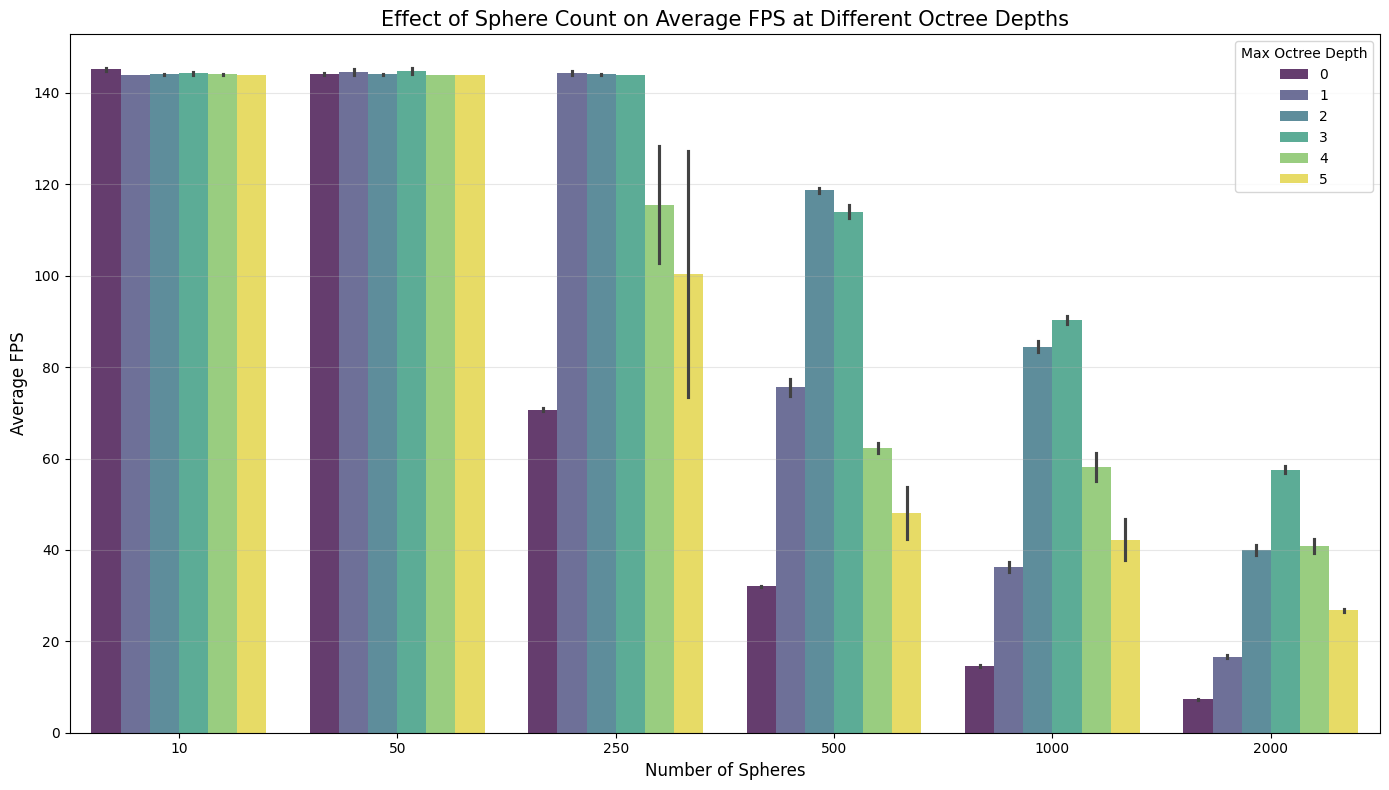

In [25]:
# 1. Effect of Sphere Count on Average FPS (Bar Plot Version)
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=df, x='Spheres', y='Avg FPS', hue='Max Octree Depth', 
           palette='viridis', alpha=0.8)

plt.title('Effect of Sphere Count on Average FPS at Different Octree Depths', fontsize=15)
plt.xlabel('Number of Spheres', fontsize=12)
plt.ylabel('Average FPS', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Max Octree Depth')

plt.tight_layout()
plt.show()

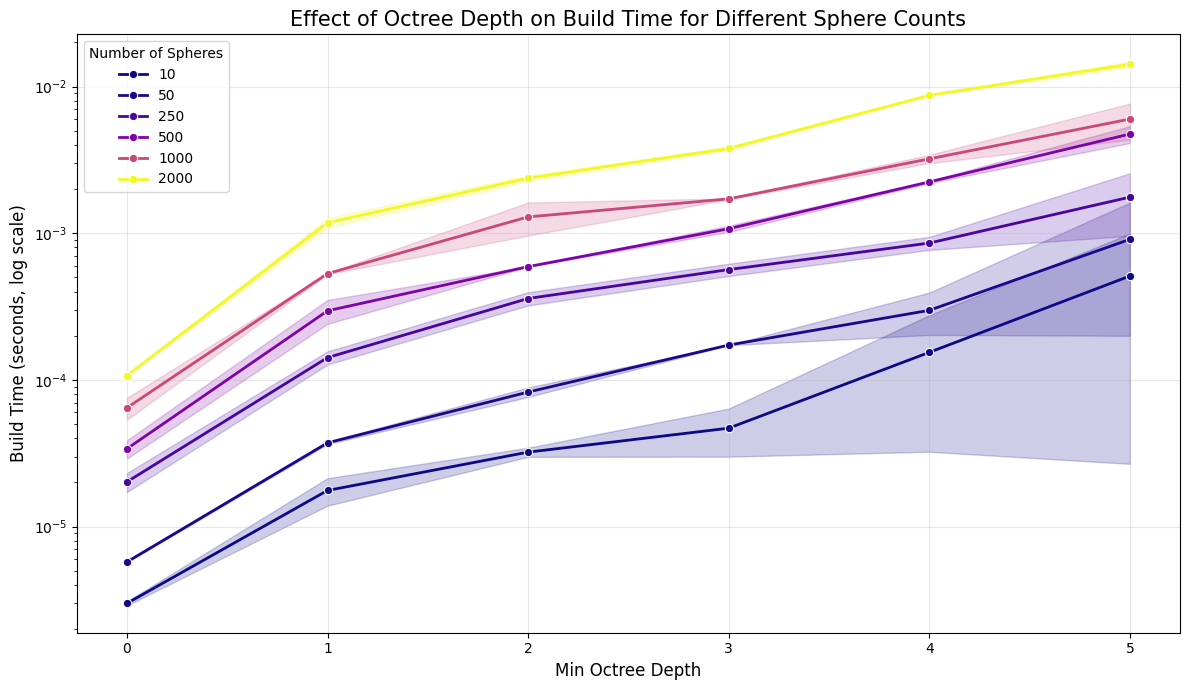

In [5]:
# 2. Effect of Octree Depth on Build Time with varying sphere counts
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='Max Octree Depth', y='Octree Build Time', hue='Spheres', 
             palette='plasma', marker='o', linewidth=2)
plt.yscale('log')
plt.title('Effect of Octree Depth on Build Time for Different Sphere Counts', fontsize=15)
plt.xlabel('Min Octree Depth', fontsize=12)
plt.ylabel('Build Time (seconds, log scale)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Number of Spheres')
plt.tight_layout()
plt.show()

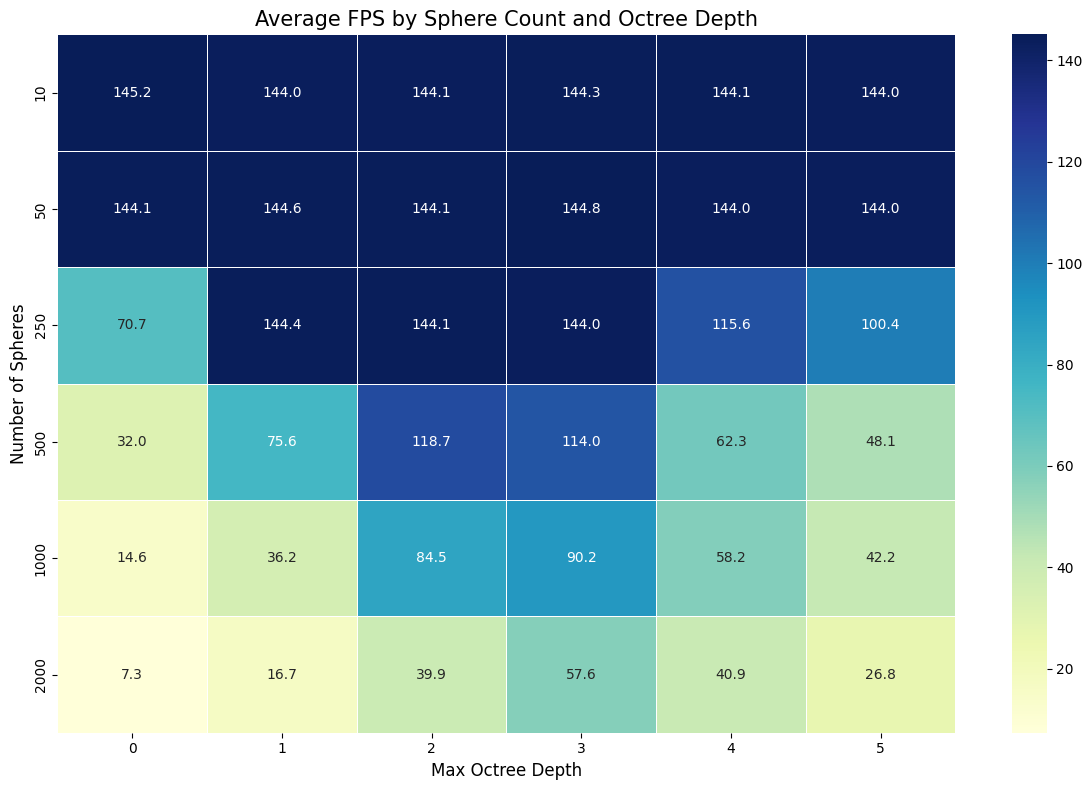

In [6]:
# 3. Heatmap of Average FPS by Sphere Count and Octree Depth
pivot_fps = df.pivot_table(values='Avg FPS', index='Spheres', columns='Max Octree Depth')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_fps, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Average FPS by Sphere Count and Octree Depth', fontsize=15)
plt.xlabel('Max Octree Depth', fontsize=12)
plt.ylabel('Number of Spheres', fontsize=12)
plt.tight_layout()
plt.show()

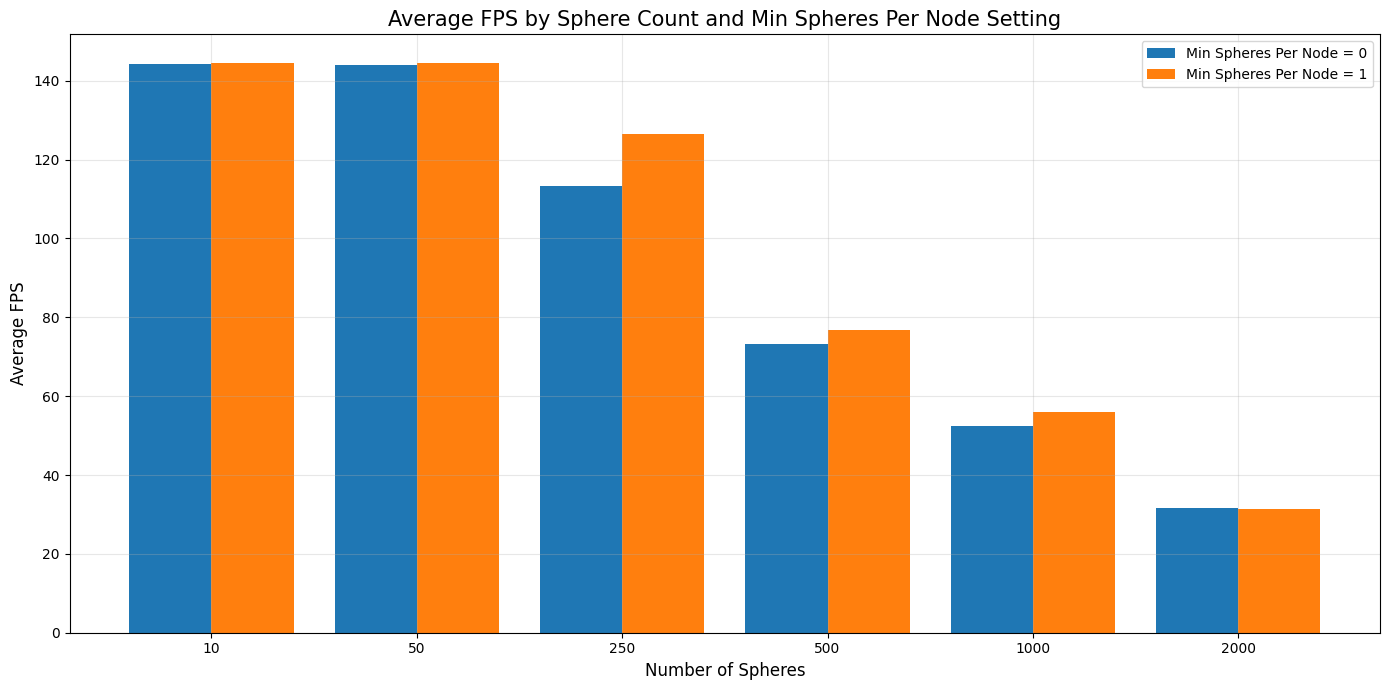

In [7]:
# 4. Min Spheres Per Node Comparison - Bar Chart
plt.figure(figsize=(14, 7))
for min_spheres in df['Min Spheres Per Node'].unique():
    subset = df[df['Min Spheres Per Node'] == min_spheres]
    avg_fps_by_spheres = subset.groupby('Spheres')['Avg FPS'].mean()
    plt.bar(np.arange(len(avg_fps_by_spheres)) + (min_spheres * 0.4), 
            avg_fps_by_spheres, width=0.4, 
            label=f'Min Spheres Per Node = {min_spheres}')

plt.xticks(np.arange(len(df['Spheres'].unique())) + 0.2, df['Spheres'].unique())
plt.title('Average FPS by Sphere Count and Min Spheres Per Node Setting', fontsize=15)
plt.xlabel('Number of Spheres', fontsize=12)
plt.ylabel('Average FPS', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

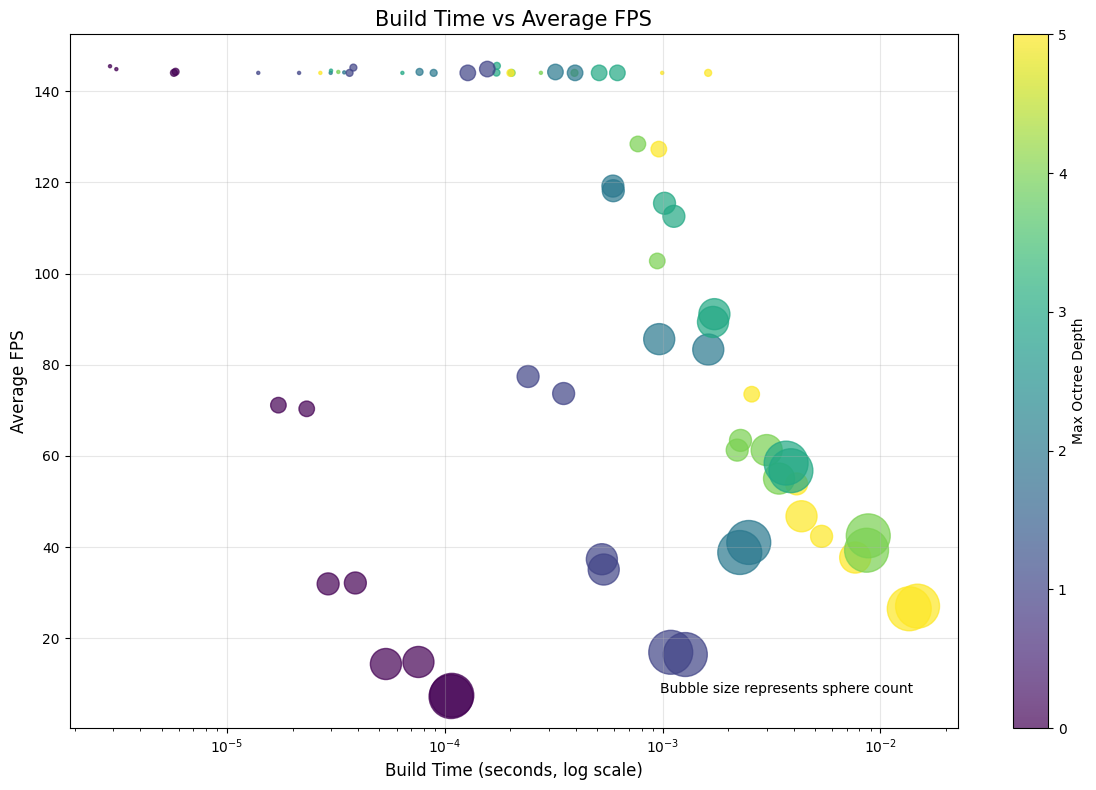

In [12]:
# 5. Build Time vs FPS scatter plot with size representing sphere count
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Octree Build Time'], df['Avg FPS'], 
                     c=df['Max Octree Depth'], s=df['Spheres']/2, 
                     alpha=0.7, cmap='viridis')

plt.xscale('log')
plt.title('Build Time vs Average FPS', fontsize=15)
plt.xlabel('Build Time (seconds, log scale)', fontsize=12)
plt.ylabel('Average FPS', fontsize=12)
plt.colorbar(scatter, label='Max Octree Depth')
plt.grid(True, alpha=0.3)

# Add annotation for point size reference
plt.text(0.95, 0.05, 'Bubble size represents sphere count', 
         transform=plt.gca().transAxes, ha='right', fontsize=10)
         
plt.tight_layout()
plt.show()

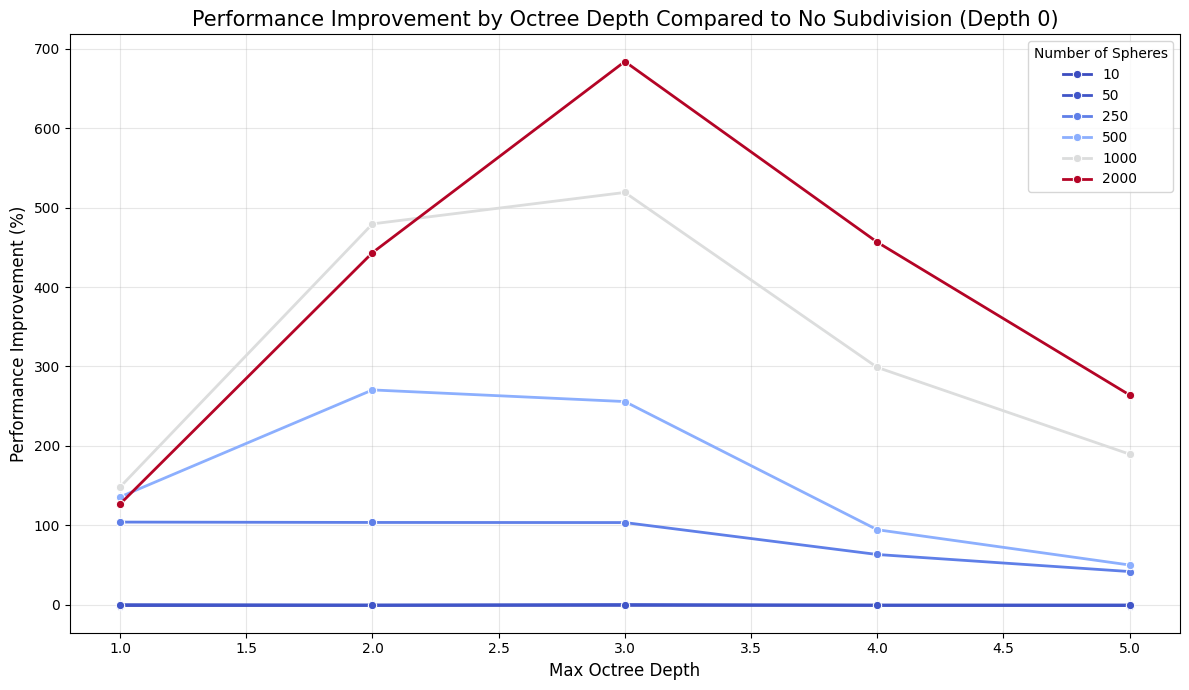

In [13]:
# 6. Performance improvement by octree depth (compared to depth 0)
performance_comparison = []
for spheres in df['Spheres'].unique():
    base_fps = df[(df['Spheres'] == spheres) & (df['Max Octree Depth'] == 0)]['Avg FPS'].mean()
    for depth in sorted(df['Max Octree Depth'].unique()):
        if depth > 0:
            current_fps = df[(df['Spheres'] == spheres) & (df['Max Octree Depth'] == depth)]['Avg FPS'].mean()
            improvement = ((current_fps - base_fps) / base_fps) * 100
            performance_comparison.append({
                'Spheres': spheres,
                'Max Octree Depth': depth,
                'Performance Improvement (%)': improvement
            })

improvement_df = pd.DataFrame(performance_comparison)

plt.figure(figsize=(12, 7))
sns.lineplot(data=improvement_df, x='Max Octree Depth', y='Performance Improvement (%)', 
             hue='Spheres', palette='coolwarm', marker='o', linewidth=2)
plt.title('Performance Improvement by Octree Depth Compared to No Subdivision (Depth 0)', fontsize=15)
plt.xlabel('Max Octree Depth', fontsize=12)
plt.ylabel('Performance Improvement (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Number of Spheres')
plt.tight_layout()
plt.show()